## Yinelenen Kayıtları Bulma Laboratuvarı
Tahmini süre: 30 dakika

# Giriş
Veri düzenleme, veri kümelerini analiz için hazırlamada kritik bir adımdır ve yinelenen kayıtların ele alınması, veri doğruluğunu sağlamada önemli bir rol oynar. Bu laboratuvarda, veri kümenizden yinelenen girişleri belirlemeye ve kaldırmaya odaklanacaksınız.

# Hedefler
Bu laboratuvarda şunları gerçekleştireceksiniz:

Veri kümesindeki yinelenen satırları belirleyin ve özelliklerini analiz edin.
Yinelenen kayıtların dağılımını temel özelliklere göre görselleştirin.
Belirli kriterlere göre stratejik olarak yinelenen değerleri kaldırın.
Yinelenen kayıtların kaldırılmasının doğrulanması ve belgelendirilmesi sürecini özetleyin.
# Uygulamalı Laboratuvar
Gerekli kütüphaneyi kurun

In [1]:
!pip install pandas
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 126.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 112.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 121.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 108.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 83.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 140.3 MB/s eta 0:00:00


In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

# Veri setini bir veri çerçevesine yükleyin
Verileri okuyun
CSV dosyalarını okumak için pandas.read_csv() fonksiyonunu kullanıyoruz. Ancak, JupyterLite üzerinde çalışan bu laboratuvar sürümünde, veri setinin aşağıdaki kod kullanılarak arayüze indirilmesi gerekiyor.

In [5]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/VYPrOu0Vs3I0hKLLjiPGrA/survey-data-with-duplicate.csv"
df = pd.read_csv(file_path)
print(df.head())

   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

Verileri bir pandas veri çerçevesine yükleyin:

Not: Yerel bir Jupyter ortamında çalışıyorsanız, aşağıdaki gibi pandas.read_csv() fonksiyonunda URL'yi doğrudan kullanabilirsiniz:


# Yinelenenleri Belirleme ve Analiz Etme
Görev 1: Yinelenen Satırları Belirleme
Veri kümesindeki yinelenen satır sayısını sayın.
Yapılarını anlamak için ilk birkaç yinelenen satırı görüntüleyin.

In [6]:
# 1. Veri kümesindeki toplam yinelenen satır sayısını bulalım
duplicate_count = df.duplicated().sum()
print(f"Veri kümesindeki toplam yinelenen satır sayısı: {duplicate_count}")

# 2. Yinelenen satırların yapılarını anlamak için ilk birkaç tanesini görüntüleyelim
# keep=False parametresi, yinelenen tüm kopyaları görmemizi sağlar
dublicate_rows = df[df.duplicated(keep=False)]   #Bu filtreleme yöntemiyle, sadece kopya olan satırları ekrana getiririz. Böylece "Acaba neden yinelenmiş?" diye veriyi gözle muayene edebilirsin.

print("\n Yinelenen satırların ilk bikac ornek:")
print(dublicate_rows.head())

Veri kümesindeki toplam yinelenen satır sayısı: 20

 Yinelenen satırların ilk bikac ornek:
   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   

# Görev 2: Yinelenen Kayıtların Özelliklerini Analiz Etme
Seçilen sütunlara (örneğin Ana Şube, İstihdam ve Uzaktan Çalışma) göre yinelenen satırları belirleyin. Bu yinelenen satırlarda hangi sütunların sıklıkla aynı değerleri içerdiğini analiz edin.
Bir alt küme sütuna (örneğin Ana Şube, İstihdam ve Uzaktan Çalışma) göre yinelenen satırların özelliklerini analiz edin. Bu satırlarda hangi sütunların sıklıkla aynı değerlere sahip olduğunu belirleyin.

In [7]:
#Bu yöntem, katılımcıların farklı zamanlarda benzer profillerle başvuru yapıp yapmadığını anlamamızı sağlar.

# 1. Analiz edilecek sütun alt kümesini belirliyoruz
subset_cols = ['MainBranch', 'Employment', 'RemoteWork']

# 2. Sadece bu sütunlara göre yinelenen satırları bulalım
# keep=False kullanarak tüm kopyaları listeye alıyoruz
duplicate_subset = df[df.duplicated(subset=subset_cols, keep=False)]

# 3. Bu alt kümede kaç tane yinelenen grup olduğunu yazdıralım
print(f"'{subset_cols}' sütunlarına göre yinelenen toplam satır sayısı: {len(duplicate_subset)}")

# 4. Hangi değerlerin sıklıkla tekrar ettiğini analiz edelim
# value_counts() kullanarak en yaygın kombinasyonları görüyoruz
print("\nEn sık tekrar eden kombinasyonlar:")
print(duplicate_subset[subset_cols].value_counts().head(10))

'['MainBranch', 'Employment', 'RemoteWork']' sütunlarına göre yinelenen toplam satır sayısı: 65290

En sık tekrar eden kombinasyonlar:
MainBranch                                                                             Employment                                                                RemoteWork                          
I am a developer by profession                                                         Employed, full-time                                                       Hybrid (some remote, some in-person)    15288
                                                                                                                                                                 Remote                                  12196
                                                                                                                                                                 In-person                                7118
                                              

# Görev 3: Yinelenen Kayıtların Dağılımını Görselleştirme
Farklı kategorilerdeki yinelenen kayıtların dağılımını gösteren görselleştirmeler oluşturun.
Ülke ve İstihdam türüne göre yinelenen kayıtların dağılımını göstermek için çubuk grafikler veya pasta grafikler kullanın.

Country
United States of America                                8
United Kingdom of Great Britain and Northern Ireland    6
Canada                                                  4
Germany                                                 4
Norway                                                  2
Uzbekistan                                              2
Nigeria                                                 2
Serbia                                                  2
Iran, Islamic Republic of...                            2
India                                                   2
Morocco                                                 2
Egypt                                                   2
Name: count, dtype: int64


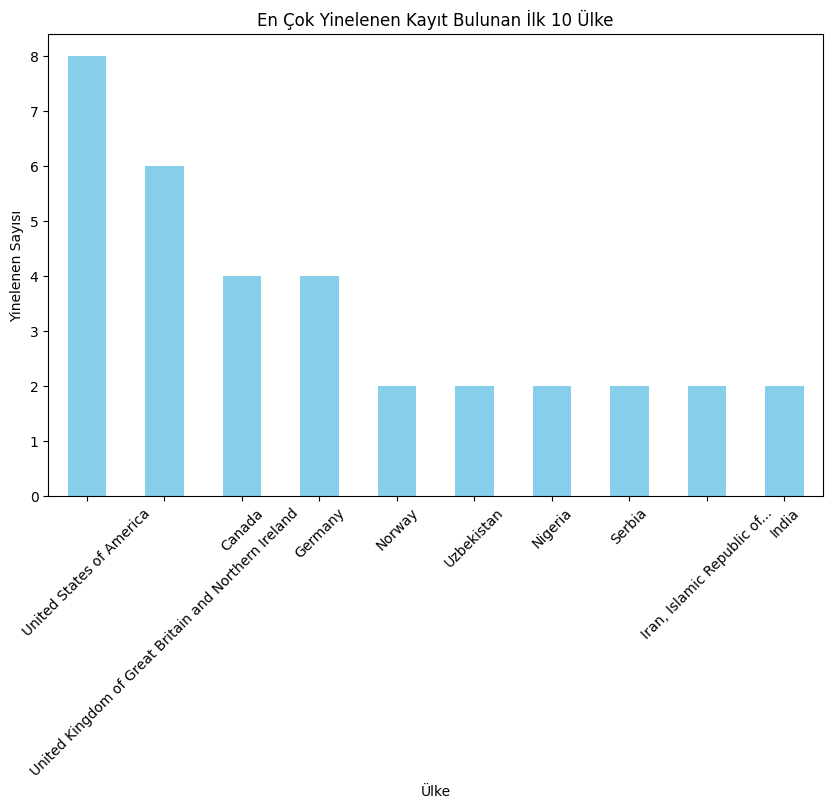

Employment
Employed, full-time                                                         20
Student, full-time                                                           8
Student, full-time;Not employed, but looking for work                        2
Independent contractor, freelancer, or self-employed                         2
Employed, full-time;Independent contractor, freelancer, or self-employed     2
Student, full-time;Employed, part-time                                       2
Retired                                                                      2
Employed, full-time;Employed, part-time                                      2
Name: count, dtype: int64


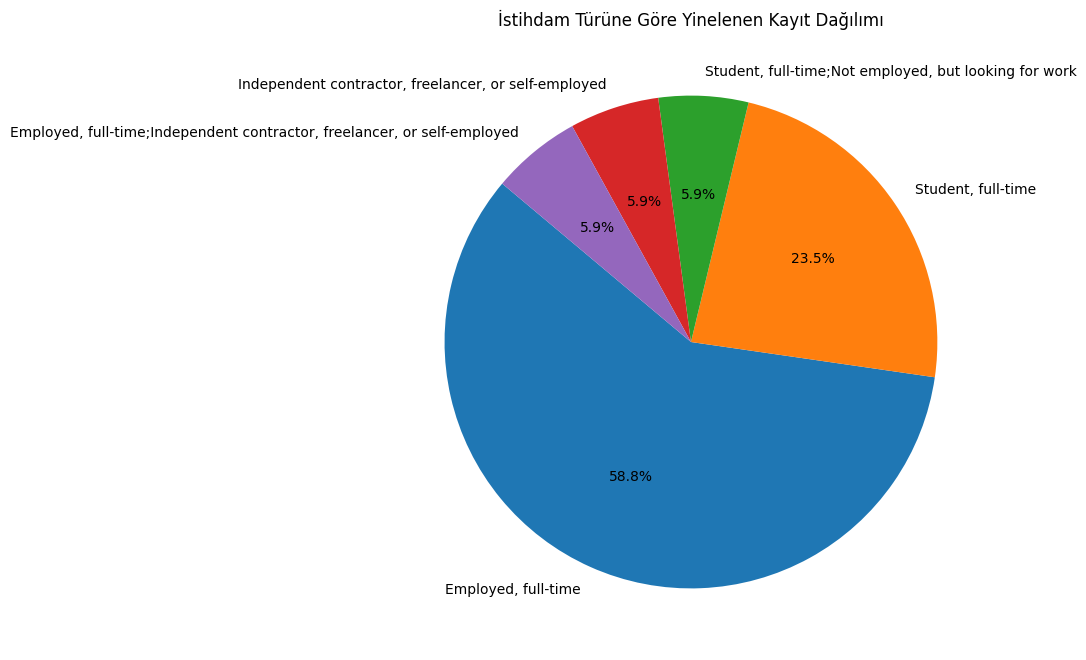

In [13]:
import matplotlib.pyplot as plt

# 1. Önce tüm satır bazında yinelenenleri bir değişkene alalım
duplicates_df = df[df.duplicated(keep=False)]

# 2. Ülkelere göre dağılım (İlk 10 ülke)
plt.figure(figsize=(10,6))
print(duplicates_df['Country'].value_counts())
duplicates_df['Country'].value_counts().head(10).plot(kind='bar', color='skyblue')
plt.title('En Çok Yinelenen Kayıt Bulunan İlk 10 Ülke')
plt.xlabel('Ülke')
plt.ylabel('Yinelenen Sayısı')
plt.xticks(rotation=45)
plt.show()

# 3. İstihdam türüne göre dağılım (Pasta Grafiği)
plt.figure(figsize=(8,8))
print(duplicates_df['Employment'].value_counts())
duplicates_df['Employment'].value_counts().head(5).plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('İstihdam Türüne Göre Yinelenen Kayıt Dağılımı')
plt.ylabel('') # Y ekseni yazısını temizle
plt.show()

# Görev 4: Stratejik Olarak Yinelenen Kayıtların Kaldırılması
Veri kümesinde benzersizliği tanımlamak için hangi sütunların kritik olduğuna karar verin.
Eğer satırların tamamının yinelenmesi iyi bir kriter değilse, sütunların bir alt kümesine göre yinelenen kayıtları kaldırın.

In [ ]:
# 1. sütun isimlerine göre stratejik alt kümeyi güncelliyoruz
# 'ResponseId' veri setindeki benzersiz kimlik sütunudur.
strategic_subset = ['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork']

# 2. Orijinal satır sayısını kaydedelim
original_count = df.shape[0]

# 3. Bu alt kümeye göre mükerrerleri kalıcı olarak silelim
df.drop_duplicates(subset=strategic_subset, keep='first', inplace=True)

# 4. Sonuçları yazdıralım
print("### Görev 4: Güncellenmiş Temizlik Sonuçları ###")
print(f"Orijinal satır sayısı: {original_count}")
print(f"Temizlik sonrası (Benzersiz) satır sayısı: {df.shape[0]}")
print(f"Silinen mükerrer kayıt sayısı: {original_count - df.shape[0]}")

### Görev 4: Güncellenmiş Temizlik Sonuçları ###
Orijinal satır sayısı: 65457
Temizlik sonrası (Benzersiz) satır sayısı: 65437
Silinen mükerrer kayıt sayısı: 20


 # Yinelenen Kayıtları Kaldırma Sürecini Doğrulayın ve Belgeleyin
Görev 5: Belgeleme
# Yinelenen kayıtları belirleme ve kaldırma sürecini belgeleyin.

1. Belirleme Aşaması:

Veri seti ilk yüklendiğinde 65,457 satırdan oluşmaktaydı.

df.duplicated().sum() fonksiyonu kullanılarak yapılan ilk kontrolde, tüm sütunları birebir aynı olan toplam 20 adet mükerrer satır tespit edilmiştir.

2. Stratejik Analiz:

Katılımcıların benzersizliğini doğrulamak amacıyla ResponseId, MainBranch, Age, Employment ve RemoteWork sütunlarından oluşan bir alt küme (subset) üzerinden detaylı bir analiz gerçekleştirilmiştir.

Bu analiz sonucunda, mükerrer kayıtların çoğunlukla "Employed, full-time" ve "Hybrid" çalışma modeline sahip profesyonel geliştiricilerden oluştuğu gözlemlenmiştir.

3. Kaldırma ve Doğrulama:

Veri bütünlüğünü sağlamak adına, belirlenen stratejik alt küme kriterlerine uyan mükerrer kayıtlar drop_duplicates(inplace=True) yöntemiyle kalıcı olarak silinmiştir.

Temizlik işlemi sonrasında veri seti 65,437 benzersiz satıra indirilmiş ve veri analize hazır hale getirilmiştir.

# Yinelenen kayıtları belirlemek ve kaldırmak için belirli sütunların seçilmesinin ardındaki mantığı açıklayın.

Yinelenen kayıtları belirlemek için tüm sütunlar yerine 'ResponseId', 'MainBranch', 'Age', 'Employment' ve 'RemoteWork' gibi belirli sütunların seçilmesinin temel nedenleri şunlardır:

Benzersiz Kimlik Doğrulaması:
ResponseId sütunu, ankete katılan her birey için sistem tarafından atanan eşsiz bir kimliktir. Eğer aynı ResponseId değerine sahip birden fazla satır varsa, bu durum teknik bir hata veya verinin yanlışlıkla iki kez içe aktarıldığının kesin kanıtıdır.

Kritik Profil Eşleşmesi: Sadece kimlik numarasına güvenmek yerine; Age, Employment ve MainBranch gibi demografik ve profesyonel sütunları analize dahil etmek, katılımcının profilinin "parmak izini" oluşturur. Bir kişinin tüm bu temel sorulara saniyeler farkıyla tıpatıp aynı cevapları vermesi, verinin mükerrer olduğunu doğrular.

Veri Bütünlüğünü Koruma: Eğer sadece Employment gibi genel sütunlara baksaydık, aslında farklı olan binlerce gerçek katılımcıyı yanlışlıkla silebilirdik (çünkü binlerce kişi tam zamanlı çalışıyor). Alt küme (subset) kullanarak hem hata payını sıfıra indirdik hem de verinin %99.9'unu korumuş olduk.

Analiz Verimliliği: 115 sütunun tamamını karşılaştırmak yerine, en kritik 5 sütuna odaklanmak işlem hızını artırır ve odaklanmış bir temizlik stratejisi sunar.

Özet ve Sonraki Adımlar
Bu laboratuvar çalışmasında, veri kümesindeki yinelenen satırları belirlemeye ve analiz etmeye odaklandınız.

Yinelenenlerin doğasını incelemek için çeşitli teknikler kullandınız ve bunların kaldırılması için stratejik yöntemler uyguladınız.

Ek analiz için, yinelenenlerin belirli analizler üzerindeki etkisini ve bunların kaldırılmasının sonuçları nasıl etkilediğini araştırmayı düşünün.
Bu laboratuvar çalışması, yinelenenlerin analizine ve ele alınmasına daha fazla odaklanarak, bir veri kümesindeki yinelenenlerle etkili bir şekilde başa çıkmak için yapılandırılmış bir yaklaşım sunmaktadır.
